In [1]:
import pandas as pd


In [19]:
"""
File naming convension for ACS 5-year downloads:
state_year_[race|income].csv

"""

def get_filepath(state):
    return '../data/{state}/'.format(state=state)

def get_filename(state, year, dataset_type):
    return get_filepath(state) + '{state}_{year}_{dataset_type}.csv'.format(
        state=state, year=year, dataset_type=dataset_type)


# geoid is the column we join data on
geoid_column_name = 'geoid'

geoid_column_map = {
    'GEO.id2': geoid_column_name
}

race_column_map = {
    'HD01_VD01': 'race: total people',
    'HD02_VD01': 'race: total people margin of error',
    'HD01_VD02': 'race: White',
    'HD01_VD03': 'race: Black',
    'HD01_VD04': 'race: American Indian and Alaska',
    'HD01_VD05': 'race: Asian',
    'HD01_VD06': 'race: Native Hawaiian and Other',
    'HD01_VD07': 'race: Other',
    'HD01_VD08': 'race: 2 or more races'
}

income_column_map = {
    'HC02_EST_VC02': 'median income',
    'HC02_MOE_VC02': 'median income margin of error',
    'HD01_VD01': 'median income',
    'HD02_VD01': 'median income margin of error'
}


def preprocess_df(df, year, column_map):
    # prune data
    # rename columns
    # drop the first row (the first row is a display label)
    df.drop([0], inplace=True)
    column_name_map = {key: str(year) + ' ' + value for key, value in column_map.items()}
    column_name_map.update(geoid_column_map)
    cols_to_drop = [col for col in df.columns if not col in column_name_map.keys()]
    df.drop(cols_to_drop,  axis=1,  inplace=True)
    df.rename(columns=column_name_map, inplace=True)
    df.set_index(geoid_column_name, inplace=True)
    return df


def preprocess_race_df(df, year):
    return preprocess_df(df, year, race_column_map)


def preprocess_income_df(df, year):
    return preprocess_df(df, year, income_column_map)


In [20]:
race_df = pd.read_csv(get_filename('ny', '2017', 'race'))
race_df = preprocess_race_df(race_df, 2017)

income_df = pd.read_csv(get_filename('ny', '2017', 'income'))
income_df = preprocess_income_df(income_df, 2017)


new_df = pd.concat([race_df, income_df], axis=1, join='inner')
new_df.head()

,2017 race: total people,2017 race: total people margin of error,2017 race: White,2017 race: Black,2017 race: American Indian and Alaska,2017 race: Asian,2017 race: Native Hawaiian and Other,2017 race: Other,2017 race: 2 or more races,2017 median income,2017 median income margin of error
geoid,,,,,,,,,,,
36001000100,1939,260,502,1142,97,16,0,15,167,27250,10262
36001000200,4731,676,710,3474,0,104,0,32,411,24091,6623
36001000300,5558,646,2589,1539,18,559,0,273,580,33454,15095
36001000401,2459,266,2183,131,20,92,0,8,25,74255,7279
36001000403,4695,456,3256,714,27,416,0,52,230,70815,10428


In [23]:
# We merge data into the income df


def add_df(df1, df2):
    # comebine the df's on geoid
    return pd.concat([df1, df2], axis=1, join='inner')

states = ['ny']
years = [str(yr) for yr in range(2012, 2018)]

states_dfs = {}


for state in states:
    df = None
    for year in years:
        income_filename = get_filename(state, year, 'income')
        income_df = pd.read_csv(income_filename)
        income_df = preprocess_income_df(income_df, year)
        if df is None:
            df = income_df
        else:
            df = add_df(df, income_df)
               
        race_filename = get_filename(state, year, 'race')
        race_df = pd.read_csv(race_filename)
        race_df = preprocess_race_df(race_df, year)
        df = add_df(df, race_df)

    states_dfs[state] = df

print(len(states_dfs))
states_dfs['ny'].head()

years ['2012', '2013', '2014', '2015', '2016', '2017']
year 2012 state ny
year 2013 state ny
year 2014 state ny
year 2015 state ny
year 2016 state ny
year 2017 state ny
1


,2012 median income,2012 median income margin of error,2012 race: total people,2012 race: total people margin of error,2012 race: White,2012 race: Black,2012 race: American Indian and Alaska,2012 race: Asian,2012 race: Native Hawaiian and Other,2012 race: Other,...,2017 median income margin of error,2017 race: total people,2017 race: total people margin of error,2017 race: White,2017 race: Black,2017 race: American Indian and Alaska,2017 race: Asian,2017 race: Native Hawaiian and Other,2017 race: Other,2017 race: 2 or more races
geoid,,,,,,,,,,,,,,,,,,,,,
36001000100,35476,12375,2235,294,602,1401,0,38,0,80,...,10262,1939,260,502,1142,97,16,0,15,167
36001000200,25756,4168,5412,792,630,4244,0,110,0,76,...,6623,4731,676,710,3474,0,104,0,32,411
36001000300,33571,9698,6421,740,2709,2824,0,196,0,465,...,15095,5558,646,2589,1539,18,559,0,273,580
36001000401,71902,13641,2412,188,2142,207,15,15,0,0,...,7279,2459,266,2183,131,20,92,0,8,25
36001000403,60298,15797,4540,500,3223,725,0,538,0,52,...,10428,4695,456,3256,714,27,416,0,52,230


In [5]:
# Save the giant dataframes to CSV
for state, df in states_dfs.items():
    filename = get_filepath(state) + 'race_and_income_data.csv'
    df.to_csv(filename)

In [6]:
import geopandas as gpd

In [7]:
shapefile_attributes = {
    'GEOID': geoid_column_name,
    'ntaname': 'Neighborhood',
    'shape_area': 'shape_area',
    'shape_leng': 'shape_leng',
    'geometry': 'geometry'
}


shapefile_filename = get_filepath('ny') + 'shapefile/nyc_census_tracts.shp'
shapefile_df = gpd.read_file(shapefile_filename)
shapefile_df.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,36,081,046200,36081046200,462,Census Tract 462,G5020,S,249611,0,...,Queens,E,046000,460,QN61,Jamaica,4112,2.381695e+06,6262.824035,"(POLYGON ((-73.792029 40.71106899999999, -73.7..."
1,36,081,046200,36081046200,462,Census Tract 462,G5020,S,249611,0,...,Queens,E,046200,462,QN61,Jamaica,4112,2.685519e+06,6935.578064,POLYGON ((-73.79202844461865 40.71106919917124...
2,36,081,046200,36081046200,462,Census Tract 462,G5020,S,249611,0,...,Queens,I,044400,444,QN61,Jamaica,4112,9.708089e+06,20651.409164,"(POLYGON ((-73.78429008235211 40.707931173193,..."
3,36,081,046200,36081046200,462,Census Tract 462,G5020,S,249611,0,...,Queens,E,046800,468,QN61,Jamaica,4112,2.471078e+06,6509.989070,(POLYGON ((-73.78464632967128 40.7107673056208...
4,36,081,046200,36081046200,462,Census Tract 462,G5020,S,249611,0,...,Queens,E,045800,458,QN06,Jamaica Estates-Holliswood,4106,2.638495e+06,8948.918835,(POLYGON ((-73.79166635145322 40.7111990532719...


In [8]:

shapefile_cols_to_drop = [col for col in shapefile_df.columns if not col in shapefile_attributes.keys()]
shapefile_df.drop(shapefile_cols_to_drop,  axis=1,  inplace=True)
shapefile_df.rename(columns=shapefile_attributes, inplace=True)
shapefile_df.set_index(geoid_column_name, inplace=True)
shapefile_df.head()

,Neighborhood,shape_area,shape_leng,geometry
geoid,,,,
36081046200,Jamaica,2.381695e+06,6262.824035,"(POLYGON ((-73.792029 40.71106899999999, -73.7..."
36081046200,Jamaica,2.685519e+06,6935.578064,POLYGON ((-73.79202844461865 40.71106919917124...
36081046200,Jamaica,9.708089e+06,20651.409164,"(POLYGON ((-73.78429008235211 40.707931173193,..."
36081046200,Jamaica,2.471078e+06,6509.989070,(POLYGON ((-73.78464632967128 40.7107673056208...
36081046200,Jamaica Estates-Holliswood,2.638495e+06,8948.918835,(POLYGON ((-73.79166635145322 40.7111990532719...


In [9]:
merged_shapes = shapefile_df.merge(states_dfs['ny'], on=geoid_column_name)
merged_shapes.head()

,Neighborhood,shape_area,shape_leng,geometry,2012 race: total people,2012 race: total people margin of error,2012 race: White,2012 race: Black,2012 race: American Indian and Alaska,2012 race: Asian,...,2017 median income margin of error,2017 race: total people,2017 race: total people margin of error,2017 race: White,2017 race: Black,2017 race: American Indian and Alaska,2017 race: Asian,2017 race: Native Hawaiian and Other,2017 race: Other,2017 race: 2 or more races
geoid,,,,,,,,,,,,,,,,,,,,,
36081046200,Jamaica,2.381695e+06,6262.824035,"(POLYGON ((-73.792029 40.71106899999999, -73.7...",7390,753,818,893,0,3158,...,7941,8189,1194,1239,999,7,3319,0,2213,412
36081046200,Jamaica,2.685519e+06,6935.578064,POLYGON ((-73.79202844461865 40.71106919917124...,7390,753,818,893,0,3158,...,7941,8189,1194,1239,999,7,3319,0,2213,412
36081046200,Jamaica,9.708089e+06,20651.409164,"(POLYGON ((-73.78429008235211 40.707931173193,...",7390,753,818,893,0,3158,...,7941,8189,1194,1239,999,7,3319,0,2213,412
36081046200,Jamaica,2.471078e+06,6509.989070,(POLYGON ((-73.78464632967128 40.7107673056208...,7390,753,818,893,0,3158,...,7941,8189,1194,1239,999,7,3319,0,2213,412
36081046200,Jamaica Estates-Holliswood,2.638495e+06,8948.918835,(POLYGON ((-73.79166635145322 40.7111990532719...,7390,753,818,893,0,3158,...,7941,8189,1194,1239,999,7,3319,0,2213,412


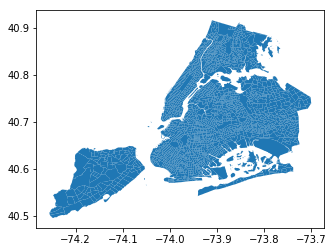

In [12]:
%matplotlib inline
merged_shapes.plot()

In [11]:
to_filename = get_filepath('ny') + 'nyc_census_tracts.geojson'
print(to_filename)
merged_shapes.to_file(to_filename, driver='GeoJSON')

../data/ny/nyc_census_tracts.geojson
